In [17]:
from chapter_7_inference import normal_approximation_to_binomial, normal_two_sided_bounds

# Get probability distribution for fair coin
mu_0, sigma_0 = normal_approximation_to_binomial(1000, 0.5)
lower_bound, upper_bound = normal_two_sided_bounds(0.95, mu_0, sigma_0)

print(mu_0, sigma_0)
print(lower_bound, upper_bound)

# Now get distribution for 55% heads coin
mu_1, sigma_1 = normal_approximation_to_binomial(1000, .55)

print(mu_1, sigma_1)

500.0 15.811388300841896
469.01026640487555 530.9897335951244
550.0 15.732132722552274


61


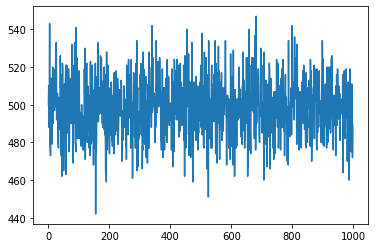

In [105]:
import random
import matplotlib.pyplot as plt

nums = []
extreme = 0

for _ in range(1000):
    num_heads = sum(1 if random.random() <= .5 else 0 for
                _ in range(1000))
    nums.append(num_heads)
    if num_heads >= 530 or num_heads <= 470:
        extreme += 1

assert 59 < extreme < 65, f"{extreme}"
print(extreme)
plt.plot(nums)

In [114]:
from numpy import random
from collections import Counter

nums = random.normal(size=100000, scale=10)

counts = Counter(nums)
mean = sum(nums) / len(nums)

print(sum(nums) / len(nums))
print(min(nums),max(nums))
deg1 = [x for x in nums if -10 < x < 10]
deg2 = [x for x in nums if -20 < x < 20]
deg3 = [x for x in nums if -30 < x < 30]
print(len(deg1) / len(nums)) # should be 68%

print(len(deg2) / len(nums)) # should be 95%
print(len(deg3) / len(nums)) # should be 99.7%

-0.003959233200315022
-42.66231128182196 44.48178311699103
0.68376
0.95393
0.99731


TypeError: float() argument must be a string or a number, not 'list'

In [128]:
def two_sided_p_value(x: float, mu: float=0, sigma: float=1) -> float:
    """How likely are we to see a value at least as extreme as x
    in either direction if our values are from N(mu, sigma)"""
    
    if x >= mu:
        # Number is greater that the mean, tail is everything greater than x
        return 2 * normal_probability_above(x, mu, sigma)
    else:
        # Number is less that the mean, tail is everything less than x
        return 2 * normal_probability_below(x, mu, sigma)

    assert 59 < extreme_value_count

In [140]:
# example
extreme_value_count = 0

for _ in range(1000):
    num_heads = sum(1 if random.random() < 0.5 else 0
                   for _ in range(1000))
    if num_heads >= 530 or num_heads <= 470:
        extreme_value_count += 1

assert 59 < extreme_value_count < 65, f"{extreme_value_count}"
print(extreme_value_count)

AssertionError: 49

In [132]:
two_sided_p_value(531.5, mu_0, sigma_0)

0.046345287837786575

In [151]:
upper_p_value = normal_probability_above
obs1 = 525
obs2 = 527

print(upper_p_value(524.5, mu_0, sigma_0)) # Greater than 5% prob -- fair
print(upper_p_value(526.5, mu_0, sigma_0)) # Less than 5% prob -- not fair

0.06062885772582072
0.04686839508859242


In [161]:
p_hat = 540 / 1000
mu = p_hat
sigma = math.sqrt(p_hat * (1 - p_hat) / 1000)
normal_two_sided_bounds(0.95, mu, sigma)

(0.5091095927295919, 0.5708904072704082)

In [171]:
from typing import List

def run_experiment() -> List[bool]:
    """Flip a fair coin 1000 times"""
    return [random.random() < 0.5 for _ in range(1000)]
run_experiment()

def reject_fairness(experiment: List[bool]) -> bool:
    num_heads = len([flip for flip in experiment if flip])
    return num_heads < 469 or num_heads > 531

random.seed(0)
experiments = [run_experiment() for _ in range(1000)]
num_rejects = len([experiment for experiment in experiments if
                  reject_fairness(experiment)])
print(num_rejects)
assert 45 < num_rejects < 55

48
